In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
# Charger le jeu de données
data = pd.read_csv('data.csv')

In [18]:
# Afficher les premières lignes du jeu de données
print("Premières lignes du jeu de données :")
print(data.head())

Premières lignes du jeu de données :
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  pe

In [19]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("\nValeurs manquantes :")
print(missing_values[missing_values > 0])


Valeurs manquantes :
Unnamed: 32    569
dtype: int64


In [20]:
# Supprimer la colonne inutile 'Unnamed: 32'
data_cleaned = data.drop(columns=['Unnamed: 32'])

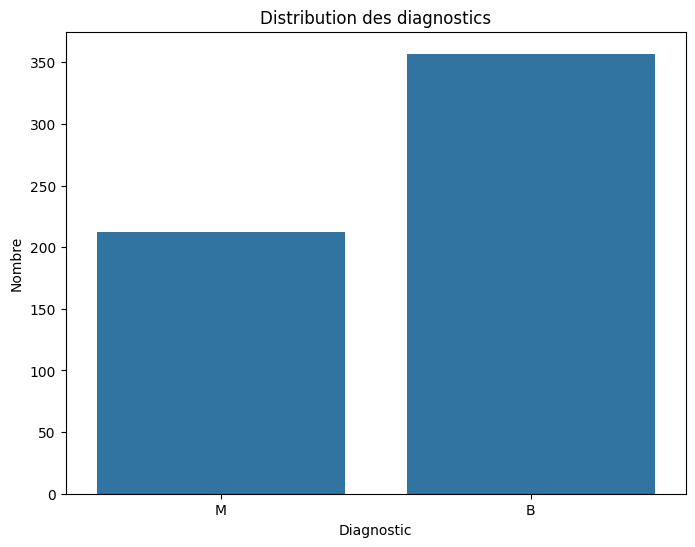

In [21]:
# Créer un diagramme de comptage pour afficher la distribution des diagnostics
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='diagnosis')
plt.xlabel('Diagnostic')
plt.ylabel('Nombre')
plt.title('Distribution des diagnostics')
plt.show()

In [23]:
# Compter les valeurs uniques dans la colonne 'diagnosis'
unique_diagnosis_counts = data['diagnosis'].value_counts()

In [22]:
# Encoder les valeurs catégorielles en valeurs numériques
label_encoder = LabelEncoder()
data['diagnosis_encoded'] = label_encoder.fit_transform(data['diagnosis'])

In [6]:
# Supprimer les colonnes inutiles
data_cleaned = data.drop(columns=['Unnamed: 32'])

In [7]:
# Diviser les données en ensembles d'entraînement et de test
X = data_cleaned.drop(columns=['diagnosis', 'id', 'diagnosis_encoded'])
y = data_cleaned['diagnosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialiser les modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [ ]:
# Entraîner et évaluer chaque modèle
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracies[name]:.4f}")

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model with increased max_iter
log_reg = LogisticRegression(max_iter=10000)

# Train the model on scaled data
log_reg.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9737


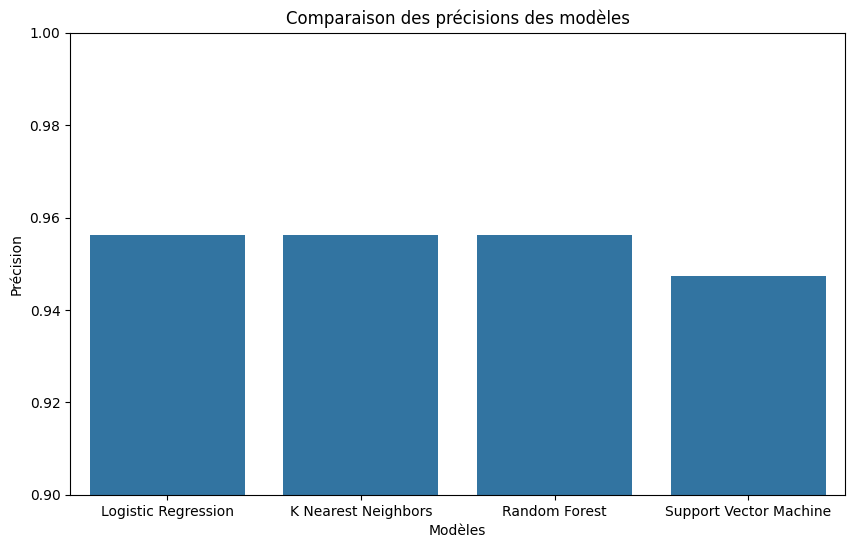

In [25]:
# Créer un graphique pour comparer les précisions des modèles
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.title('Comparaison des précisions des modèles')
plt.ylim(0.9, 1.0)
plt.show()

In [14]:
# Afficher les résultats
print("Counts of unique rows in the 'diagnosis' column:")
print(unique_diagnosis_counts)
print("\nModel Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Counts of unique rows in the 'diagnosis' column:
diagnosis
B    357
M    212
Name: count, dtype: int64

Model Accuracies:
Logistic Regression: 0.9561
K Nearest Neighbors: 0.9561
Random Forest: 0.9649
Support Vector Machine: 0.9474


In [15]:
# Déterminer le meilleur modèle
best_model_name = max(accuracies, key=accuracies.get)
print(f"\nThe best model is {best_model_name} with an accuracy of {accuracies[best_model_name]:.4f}")


The best model is Random Forest with an accuracy of 0.9649
